# Analyzing GDP Data

----

#### Summary
In this notebook I will be working on 'gdp.csv'. In this data file GDP is represented in dollar value ($). I am interested in whether suicide rate is related to GDP. Specifically, I wonder if countries with higher GPD have lower suicide rates. 


In [2]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import math
import seaborn as sns


df1 = pd.read_csv('../data/Raw_data/gdp.csv')
world_total = pd.read_csv('../data/Cleaned_data/suicide_total.csv')


#### Cleaning up data
This data looks quite messy to start with, so I performed the following steps:
* First I realized that there are 2 empty rows, and that the 4th row should actually be the column titles, so I dropped 3 rows
* The data frame contains has 60 years of data, but I'm only interested in the 3 that corresponds to what I have from the world suicide data (2000,2010,2016). So I created a new dataframe containing the country names and those years only.
* Because the numbers are too big that they're hard to read I decided to divide them by 1000000 so the unit is a million
* Finally I added a row called means with the mean GDP for the 3 years
* I also rounded the numbers to 1 decimal place for the sake of cleaner presentation

In [5]:
df1
#drop 3 rows
df1= pd.read_csv('../data/Raw_data/gdp.csv',skiprows=3)
#keep relevant data only
gdp=df1.filter(["Country Name", "Country Code","2000","2010","2016"], axis=1)

#convert the numbers to millions
gdp["2000"]=gdp["2000"].div(1000000)
gdp["2010"]=gdp["2010"].div(1000000)
gdp["2016"]=gdp["2016"].div(1000000)

#mean gdp
gdp['means']=(gdp['2016']+gdp['2010']+gdp['2000'])/3

#rounding
gdp=gdp.round({'2000': 1, '2010': 1,'2016':1,'means':1})


#saved for later use
gdp.to_csv("../data/gdp_cleaned.csv",index=False)
gdp

,Country Name,Country Code,2000,2010,2016,means
0,Aruba,ABW,1873.5,2390.5,2965.9,2410.0
1,Afghanistan,AFG,NaN,15856.6,19362.6,NaN
2,Angola,AGO,9129.6,83799.5,101124.0,64684.4
3,Albania,ALB,3480.4,11926.9,11861.2,9089.5
4,Andorra,AND,1429.0,3450.0,2896.7,2591.9
...,...,...,...,...,...,...
259,Kosovo,XKX,1849.2,5835.9,6719.2,4801.4
260,"Yemen, Rep.",YEM,9652.4,30906.7,28084.7,22881.3
261,South Africa,ZAF,136361.0,375349.0,296357.0,269355.7
262,Zambia,ZMB,3600.7,20265.6,20954.8,14940.3


Then I wanted to examine GDP ranking but realized that some of the entries are not countries but regions (e.g. North America, OECD members), so I decided to merge gdp with world suicide first so that those non-country entries will be excluded automatically (as they are not in world suicide)

In [6]:
gdp_sort=gdp.dropna()
gdp_sort=gdp_sort.sort_values('2016',ascending=False)
print(gdp_sort.head(10))
print(gdp_sort.tail(10))
#noticed non-country entries, decided to go ahead and merge with world suicide

                  Country Name Country Code        2000        2010  \
257                      World          WLD  33618600.0  66113100.0   
93                 High income          HIC  27650300.0  45581200.0   
179               OECD members          OED  27500500.0  45042200.0   
196  Post-demographic dividend          PST  26283300.0  42520500.0   
101           IDA & IBRD total          IBT   6277250.0  21475400.0   
138        Low & middle income          LMY   5958330.0  20535600.0   
154              Middle income          MIC   5831030.0  20147800.0   
100                  IBRD only          IBD   5810310.0  20012900.0   
61         East Asia & Pacific          EAS   8297740.0  16988600.0   
247        Upper middle income          UMC   4611370.0  16216900.0   

           2016       means  
257  76335800.0  58689166.7  
93   49167100.0  40799533.3  
179  48160400.0  40234366.7  
196  45489400.0  38097733.3  
101  28165300.0  18639316.7  
138  27180900.0  17891610.0  
154  266

In [7]:
#merging world suicide and gdp
merged = pd.merge(left=gdp, right=world_total, left_on='Country Name', right_on='Country')
merged

,Country Name,Country Code,2000_x,2010_x,2016_x,means_x,Country,Sex,2016_y,2015,2010_y,2000_y,means_y
0,Afghanistan,AFG,NaN,15856.6,19362.6,NaN,Afghanistan,Both sexes,6.4,6.6,7.4,8.1,7.300000
1,Angola,AGO,9129.6,83799.5,101124.0,64684.4,Angola,Both sexes,8.9,9.3,10.4,13.9,11.066667
2,Albania,ALB,3480.4,11926.9,11861.2,9089.5,Albania,Both sexes,5.6,5.3,7.7,5.8,6.366667
3,United Arab Emirates,ARE,104337.0,289787.0,357045.0,250389.7,United Arab Emirates,Both sexes,2.7,2.7,2.8,3.4,2.966667
4,Argentina,ARG,284204.0,423627.0,557531.0,421787.3,Argentina,Both sexes,9.1,8.7,8.6,9.5,9.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vanuatu,VUT,272.0,700.8,804.3,592.4,Vanuatu,Both sexes,5.4,5.5,6.2,8.7,6.766667
156,Samoa,WSM,269.0,663.2,799.4,577.2,Samoa,Both sexes,5.4,5.5,6.4,10.7,7.500000
157,South Africa,ZAF,136361.0,375349.0,296357.0,269355.7,South Africa,Both sexes,12.8,13.1,13.9,14.4,13.700000
158,Zambia,ZMB,3600.7,20265.6,20954.8,14940.3,Zambia,Both sexes,11.3,11.2,11.5,14.1,12.300000


#### Data Observation

After I merged the 2 dataframes, the total number of row went down to 160. This is because the world suicide data file is missing some of the countries listed in GDP, as well as because the names of certain countries don't match here. Still, I think 160 is a good number to work with .

Now I can start looking at the GDP data, ranked from highest to lowest based on figures from 2016. The countries that top the list are not surprising to see. The United States tops the chart with 18707 billion dollars. Second place goes to China, which is also the fastest growing country in terms of GDP: starting from  1211 billion in 2000, it is now 11233 billion dollar, which is 10x its GDP in 2000. Countries with the lowest GDP are Samoa, Tonga, and Kiribati.

In [8]:
merged_sort=merged.sort_values('2016_x',ascending=False)
merged_sort=merged_sort.dropna()
print(merged_sort.head(10))
print(merged_sort.tail(10))

       Country Name Country Code      2000_x      2010_x      2016_x  \
153   United States          USA  10252300.0  14992100.0  18707200.0   
29            China          CHN   1211350.0   6087160.0  11233300.0   
74            Japan          JPN   4887520.0   5700100.0   4922540.0   
37          Germany          DEU   1943150.0   3396350.0   3466790.0   
51   United Kingdom          GBR   1657820.0   2475240.0   2694280.0   
49           France          FRA   1362250.0   2642610.0   2471290.0   
66            India          IND    468395.0   1675620.0   2294800.0   
71            Italy          ITA   1143830.0   2134020.0   1875800.0   
20           Brazil          BRA    655421.0   2208870.0   1795700.0   
26           Canada          CAN    742295.0   1613460.0   1528240.0   

        means_x         Country         Sex  2016_y  2015  2010_y  2000_y  \
153  14650533.3   United States  Both sexes    13.7  13.3    11.8    10.1   
29    6177270.0           China  Both sexes     8.0  

#### Examining Relationship
Now I will start looking at the relationship between GDP and suicide rate using some simple plots with a regression line. Because the variables that I am comparing have different scales so I applied math.log to them (not sure if this is right). Unfortunate I wasn't able to find a convincing relationship between GDP and suicide rate; it was largely inconsistent and scattered. Supposedly, countries with higher GDP have stronger economies and people are living better off. However, all other than data from 2000 shows a opposite trend (though the line look so flat that there is hardly any relationship). From there I concluded that GDP is not a good predictor for suicide rate. This can be rationalized by the fact that the GDP of a country does not necessarily represent the living condition of an average individual living in that country. It also suggests that perhaps money can't buy happiness. 

Text(0.5, 1.0, 'Assocation between gdp and suicide rate in 2016')

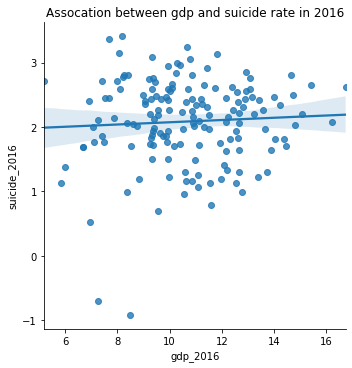

In [12]:
gdp_2016 = merged['2016_x'].apply(math.log)
suicide_2016 = merged['2016_y'].apply(math.log)

merged['gdp_2016']=gdp_2016
merged['suicide_2016']=suicide_2016


sns.lmplot(x='gdp_2016', y='suicide_2016', data=merged)
plt.title('Assocation between gdp and suicide rate in 2016')

Text(0.5, 1.0, 'Assocation between gdp and suicide rate in 2000')

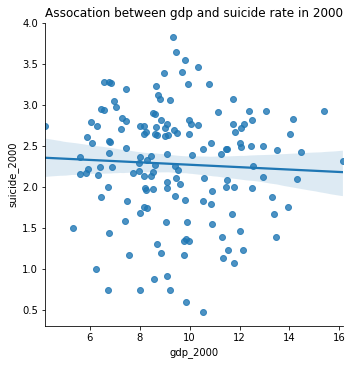

In [13]:
gdp_2000 = merged['2000_x'].apply(math.log)
suicide_2000 = merged['2000_y'].apply(math.log)

merged['gdp_2000']=gdp_2000
merged['suicide_2000']=suicide_2000


sns.lmplot(x='gdp_2000', y='suicide_2000', data=merged)
plt.title('Assocation between gdp and suicide rate in 2000')

Text(0.5, 1.0, 'Assocation between gdp and suicide rate (avg 3 years)')

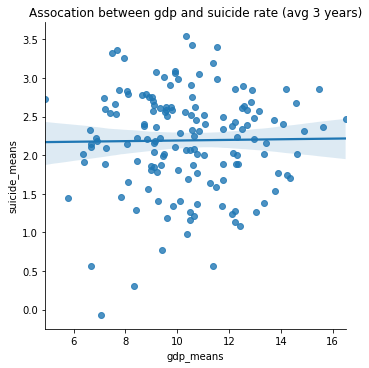

In [14]:
gdp_means = merged['means_x'].apply(math.log)
suicide_means = merged['means_y'].apply(math.log)

merged['gdp_means']=gdp_means
merged['suicide_means']=suicide_means


sns.lmplot(x='gdp_means', y='suicide_means', data=merged)
plt.title('Assocation between gdp and suicide rate (avg 3 years)')